# Model 1 - Horizontal stratigraphic

This is the most simpel model of horizontally stacked layers. We start by importing the necessary dependencies:

In [1]:
# These two lines are necessary only if GemPy is not installed
import sys, os
sys.path.append("../..")

# Importing GemPy
import gempy as gp

# Embedding matplotlib figures in the notebooks
%matplotlib inline

# Importing auxiliary libraries
import numpy as np
import matplotlib.pyplot as plt

# new for this
import importlib
from gempy.assets import kriging

Creating the model by importing the input data and displaying it:

In [2]:
geo_data = gp.create_data([0,1000,0,50,0,1000],resolution=[50,1,50], 
                        path_o = os.pardir+"/data/input_data/jan_models/model1_orientations.csv",
                        path_i = os.pardir+"/data/input_data/jan_models/model1_surface_points.csv") 

Active grids: ['regular']


In [3]:
#geo_data.get_data()

Setting and ordering the units and series:

In [4]:
gp.map_series_to_surfaces(geo_data, {"Strat_Series": ('rock2','rock1'),"Basement_Series":('basement')})

,surface,series,order_surfaces,isBasement,color,id
0,rock2,Strat_Series,1,False,#015482,1
1,rock1,Strat_Series,2,False,#9f0052,2
2,basement,Basement_Series,1,True,#ffbe00,3


In [5]:
#%matplotlib inline
#gp.plot.plot_data(geo_data, direction='y')

Calculating the model:

In [6]:
interp_data = gp.set_interpolation_data(geo_data, compile_theano=True,
                                        theano_optimizer='fast_compile')

Compiling theano function...


WARNING (theano.gof.compilelock): Overriding existing lock by dead process '14128' (I am process '14172')


Compilation Done!


In [7]:
sol = gp.compute_model(geo_data)

../..\gempy\core\solution.py:258: UserWarning: Surfaces not computed due to: marching_cubes_lewiner() got an unexpected keyword argument 'mask'
  warnings.warn('Surfaces not computed due to: ' + str(e))


Displaying the result in x and y direction:

In [8]:
import gempy as gp
importlib.reload(kriging)

<module 'gempy.assets.kriging' from '../..\\gempy\\assets\\kriging.py'>

In [9]:
test_data = np.array([[100,.5,500,2],[900,.5,500,1],[500,.5,550,1],[300,.5,400,5]])

In [10]:
sol.grid.values[:,1]

array([0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5])

In [11]:
kriging_model = kriging.kriging_model(model=sol, domain=[2],data=test_data)

In [12]:
kriging_model.range_ = 500
kriging_model.moving_neighbourhood  = 'all'
kriging_model.set_kriging_type('SK')
kriging_model.nugget = 0

In [13]:
kriging_model.create_kriged_field()

## Plotting Options

In [14]:
x = kriging_model.results_df['X'].values
y = kriging_model.results_df['Z'].values
prop = kriging_model.results_df['est_value'].values
var = kriging_model.results_df['est_variance'].values

In [15]:
import matplotlib.tri as tri
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

def plot_contour(x,y,z,resolution = 50,contour_method='linear'):
    resolution = str(resolution)+'j'
    X,Y = np.mgrid[min(x):max(x):complex(resolution),   min(y):max(y):complex(resolution)]
    points = [[a,b] for a,b in zip(x,y)]
    Z = griddata(points, z, (X, Y), method=contour_method)
    return X,Y,Z


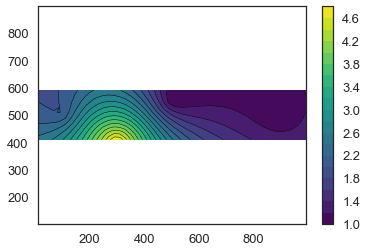

In [16]:
fig1, ax1 = plt.subplots()
ax1.axis('equal')
tcf = ax1.tricontourf(x, y, prop, 20, cmap='viridis')
tcf_lines = ax1.tricontour(x, y, prop, 20, linewidths=0.5, colors='k')
fig1.colorbar(tcf)

plt.show()

In [17]:
#plt.tricontour(x, y, var, 10, linewidths=0.5, colors='k')
#plt.tricontourf(x, y, var, 10, cmap='viridis')
#plt.axis('equal')

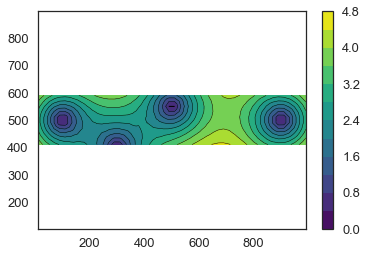

In [18]:
fig2, ax2 = plt.subplots()
ax2.axis('equal')
tcf_var = ax2.tricontourf(x, y, var, 10, cmap='viridis')
tcf_lines_var = ax2.tricontour(x, y, var, 10, linewidths=0.5, colors='k')
fig2.colorbar(tcf_var)

plt.show()

In [19]:
kriging_model.create_gaussian_field()

In [20]:
x = kriging_model.results_sim_df['X'].values
y = kriging_model.results_sim_df['Z'].values
prop = kriging_model.results_sim_df['sim_value'].values
var = kriging_model.results_sim_df['est_variance'].values

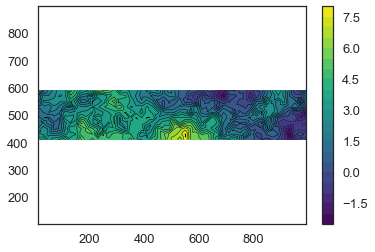

In [21]:
fig3, ax3 = plt.subplots()
ax3.axis('equal')
tcf = ax3.tricontourf(x, y, prop, 20, cmap='viridis')
tcf_lines = ax3.tricontour(x, y, prop, 20, linewidths=0.5, colors='k')
fig3.colorbar(tcf)

plt.show()

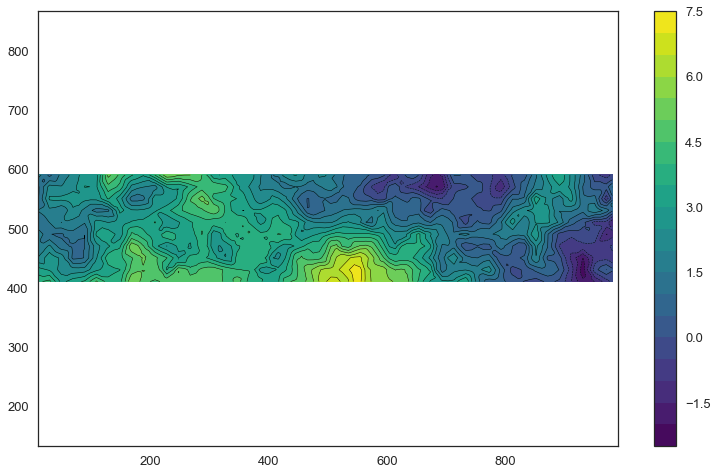

In [22]:
z = prop
X,Y,Z = plot_contour(x,y,z,resolution = 100,contour_method='linear')

fig, ax = plt.subplots(figsize=(13,8))
#ax.scatter(x,y, color="black", linewidth=1, s=2, zorder = 2)
cs = ax.contourf(X,Y,Z, levels=20, cmap='viridis')
cs_line = ax.contour(X,Y,Z, levels=20, colors='black', linewidths=0.5)
#ax.contour(X,Y,Z, levels=15, colors='black')
ax.axis('equal')
fig.colorbar(cs)
plt.show()


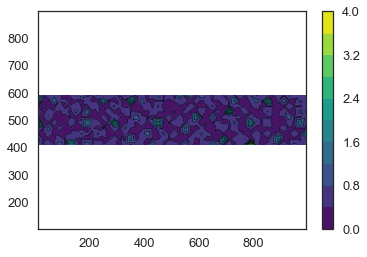

In [23]:
fig4, ax4 = plt.subplots()
ax4.axis('equal')
tcf_var = ax4.tricontourf(x, y, var, 10, cmap='viridis')
tcf_lines_var = ax4.tricontour(x, y, var, 10, linewidths=0.5, colors='k')
fig4.colorbar(tcf_var)

plt.show()

In [24]:
z = prop
from scipy.interpolate import griddata

(10.0, 990.0, 410.0, 590.0)

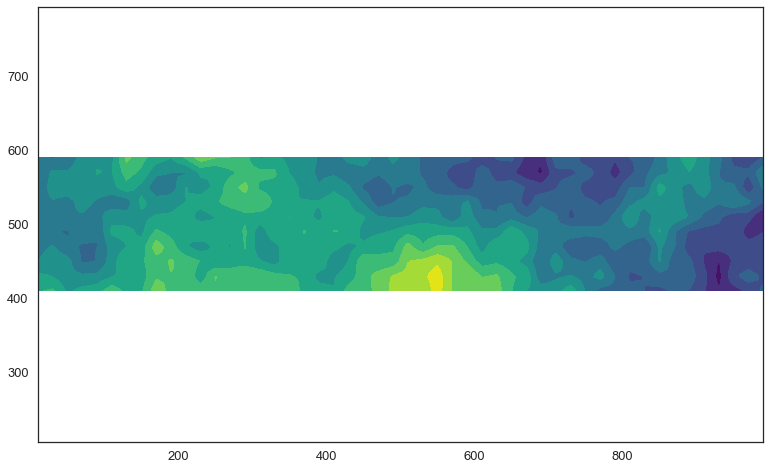

In [25]:
X,Y,Z = plot_contour(x,y,z,resolution = 50,contour_method='linear')

fig, ax = plt.subplots(figsize=(13,8))
#ax.scatter(x,y, color="black", linewidth=1, edgecolor="ivory", s=50)
ax.contourf(X,Y,Z, levels=10, cmap='viridis')
ax.axis('equal')

## Comparison with GStools (Simulation)

In [26]:
#print(kriging_model.inp_var)
#print(kriging_model.inp_mean)
#print(np.var(cond_val))
#print(np.mean(cond_val))

In [27]:
from gstools import SRF, Exponential
import matplotlib.pyplot as plt
import gstools as gs

In [28]:
print(kriging_model.krig_grid.shape)

kriging_model.krig_grid[150]

(500, 3)


array([1.9e+02, 5.0e-01, 5.7e+02])

In [166]:
test_data = np.array([[110,0,510,2],[910,0,510,1],[510,0,530,1],[310,0,410,5]])

x_cond = test_data[:,0]
y_cond = test_data[:,2]
cond_val = test_data[:,3]
x = range(0,1000,20)
y = range(400,600,20)

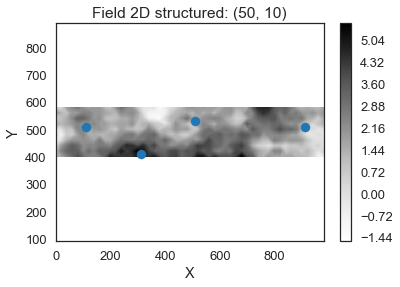

In [167]:
#Gaussian field (SGS)
model = Exponential(dim=2, var=np.var(cond_val), len_scale=200)

srf = SRF(model, mean=np.mean(cond_val))
srf.set_condition((x_cond, y_cond),cond_val)
field = srf((x, y), mesh_type='structured')

fig, ax = plt.subplots()
ax.axis('equal')
srf.plot(fig=fig, ax=ax)
ax.scatter(x_cond, y_cond)


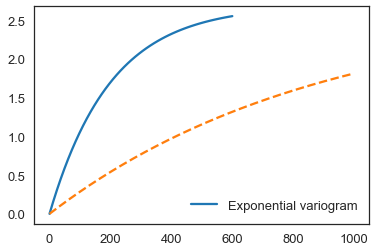

In [168]:
# Wow s varigoram exactly the same (sweet)
d = np.arange(0,1000,1)
test_vario = kriging_model.exponential_variogram_model(d)

fig7, ax7 = plt.subplots()

gs.covmodel.plot.plot_variogram(model, ax=ax7)
ax7.plot(d, test_vario,'--')

## Comparison to GStools (Kriging)

In [169]:
from gstools import krige
import gempy as gp
importlib.reload(kriging)

<module 'gempy.assets.kriging' from '../..\\gempy\\assets\\kriging.py'>

In [170]:
test_data = np.array([[100,.5,500,2],[900,.5,500,1],[500,.5,550,1],[300,.5,400,5]])
#test_data = np.array([[110,0,510,2],[910,0,510,1],[510,0,530,1],[310,0,410,5]])

x_cond = test_data[:,0]
y_cond = test_data[:,2]
cond_val = test_data[:,3]
x = range(0,1000,20)
y = range(400,600,20)

In [171]:
# Kriged field

# they use other sill - increase with nugget effect

model = Exponential(dim=2, var=np.var(cond_val)-2 , len_scale=200, nugget=2)

srf = krige.Ordinary(model, cond_pos=(x_cond, y_cond), cond_val=cond_val)
field = srf((x, y), mesh_type='unstructured')

fig, ax = plt.subplots()
ax.axis('equal')
srf.plot(fig=fig, ax=ax)
ax.scatter(x_cond, y_cond)

ValueError: len(x) = 50 != len(y) = 10 for unstructured grids

In [172]:
# My calc:
kriging_model = kriging.kriging_model(model=sol, domain=[2],data=test_data)

kriging_model.krig_grid = np.round(kriging_model.krig_grid,0)

kriging_model.range_ = 500
kriging_model.moving_neighbourhood  = 'all'
kriging_model.set_kriging_type('OK')
kriging_model.nugget = 0
kriging_model.sill = np.var(cond_val)

kriging_model.create_kriged_field()
prop = kriging_model.results_df['est_value'].values
var = kriging_model.results_df['est_variance'].values

In [173]:
print(cond_val)
print(x_cond)
print(y_cond)
print(kriging_model.data_df)

[2. 1. 1. 5.]
[100. 900. 500. 300.]
[500. 500. 550. 400.]
       X    Y      Z  property
0  100.0  0.5  500.0       2.0
1  900.0  0.5  500.0       1.0
2  500.0  0.5  550.0       1.0
3  300.0  0.5  400.0       5.0


In [174]:
# check effect of range on mean
ranges = np.arange(10,900,10)
means_me = np.zeros(len(ranges))
means_them = np.zeros(len(ranges))
count = 0

print(kriging_model.sill)

for i in ranges:
    kriging_model.range_ = i
    kriging_model.nugget = 0
    kriging_model.create_kriged_field()
    means_me[count]=np.mean(kriging_model.results_df['est_value'].values)
    
    model = Exponential(dim=2, var=np.var(cond_val) , len_scale=i, nugget=0)
    #srf = krige.Simple(model, mean=np.mean(cond_val), cond_pos=(x_cond, y_cond), cond_val=cond_val)
    srf = krige.Ordinary(model, cond_pos=(x_cond, y_cond), cond_val=cond_val)
    field = srf((x, y), mesh_type='structured')
    means_them[count]=np.mean(field[0])
    count+=1

2.6875


Text(0.5, 1.02, '(Nugget = 0, Input mean = 2.25, Input variance = 2.6875, Exponential Model)')

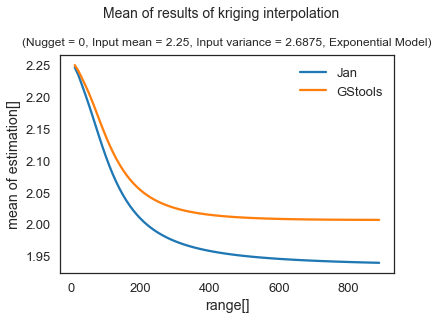

In [175]:
plt.plot(ranges, means_me, label='Jan')
plt.plot(ranges, means_them, label='GStools')
plt.legend()
plt.xlabel('range[]')
plt.ylabel('mean of estimation[]')
plt.suptitle('Mean of results of kriging interpolation', y=1.05, fontsize=14)
plt.title('(Nugget = 0, Input mean = 2.25, Input variance = 2.6875, Exponential Model)', y=1.02, fontsize=12)

In [176]:
#print(field.shape)
print("My mean:", np.mean(kriging_model.results_df['est_value'].values))
print("Their mean:", np.mean(field[0]))

My mean: 1.939009343193377
Their mean: 2.006419138449953


In [177]:
print(np.max(kriging_model.results_df['est_value'].values))
print(np.max(field[0]))

4.763829126871681
5.000000000000001


In [178]:
# Now I have to find the reason for this

In [179]:
# check effect of range on mean
ranges = np.arange(0,2.5,0.1)
means_me = np.zeros(len(ranges))
means_them = np.zeros(len(ranges))
count = 0


for i in ranges:
    kriging_model.range_ = 400
    kriging_model.nugget = i
    kriging_model.sill= np.var(cond_val)
    kriging_model.create_kriged_field()
    means_me[count]=np.mean(kriging_model.results_df['est_value'].values)
    
    model = Exponential(dim=2, var=np.var(cond_val)-i , len_scale=400, nugget=i)
    #srf = krige.Simple(model, mean=np.mean(cond_val), cond_pos=(x_cond, y_cond), cond_val=cond_val)
    srf = krige.Ordinary(model, cond_pos=(x_cond, y_cond), cond_val=cond_val)
    field = srf((x, y), mesh_type='structured')
    means_them[count]=field[0].mean()
    count+=1

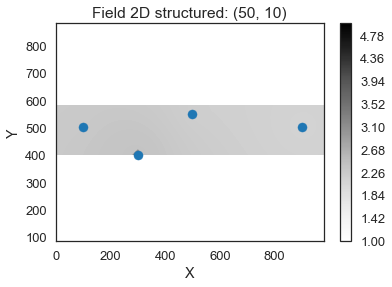

In [180]:
fig, ax = plt.subplots()
ax.axis('equal')
srf.plot(fig=fig, ax=ax)
ax.scatter(x_cond, y_cond)

Text(0.5, 1.02, '(Nugget = 0, Input mean = 2.25, Input variance = 2.6875, Exponential Model)')

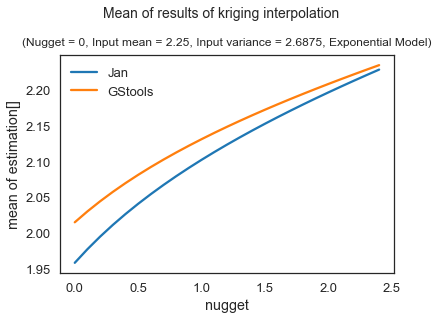

In [181]:
plt.plot(ranges, means_me, label='Jan')
plt.plot(ranges, means_them, label='GStools')
plt.legend()
plt.xlabel('nugget')
plt.ylabel('mean of estimation[]')
plt.suptitle('Mean of results of kriging interpolation', y=1.05, fontsize=14)
plt.title('(Nugget = 0, Input mean = 2.25, Input variance = 2.6875, Exponential Model)', y=1.02, fontsize=12)

In [146]:
np.max(means_me)

2.2301709799883165

In [82]:
np.max(means_them)

2.158468966464617

## Testing more variogram models and options

In [83]:
d = np.arange(0,5000,1)
test_cov = kriging_model.exponential_covariance_model(d)
test_vario = kriging_model.exponential_variogram_model(d)

test_relation = kriging_model.sill-test_vario

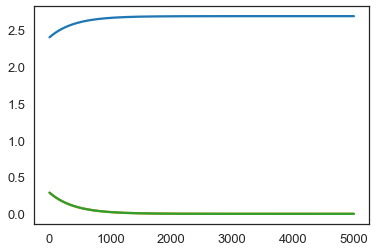

In [84]:
plt.plot(d, test_vario)
plt.plot(d, test_relation)
plt.plot(d, test_cov)

In [85]:
from scipy import special

In [86]:

def matern(d, range_=1, c0=1, s=0.5, nugget=0):
    r"""Matérn Variogram function
    Implementation of the Matérn variogram function. Calculates the
    dependent variable for a given lag (h). The nugget (b) defaults to be 0.
    Parameters
    ----------
    h : float
        Specifies the lag of separating distances that the dependent variable
        shall be calculated for. It has to be a positive real number.
    r : float
        The effective range. Note this is not the range parameter! For the
        Matérn variogram function the range parameter a is defined to be
        :math:`a = \frac{r}{2}`. The effective range is the lag
        where 95% of the sill are exceeded. This is needed as the sill is
        only approached asymptotically by Matérn model.
    c0 : float
        The sill of the variogram, where it will flatten out. The function
        will not return a value higher than C0 + b.
    s : float
        Smoothness parameter. The smoothness parameter can shape a smooth or
        rough variogram function. A value of 0.5 will yield the exponential
        function, while a smoothness of +inf is exactly the Gaussian model.
        Typically a value of 10 is close enough to Gaussian shape to simulate
        its behaviour. Low values are considered to be 'smooth', while larger
        values are considered to describe a 'rough' random field.
    b : float
        The nugget of the variogram. This is the value of independent
        variable at the distance of zero. This is usually attributed to
        non-spatial variance.
    Returns
    -------
    gamma : numpy.float64
        Unlike in most variogram function formulas, which define the function
        for :math:`2*\gamma`, this function will return :math:`\gamma` only.
    Notes
    -----
    The formula and references will follow.
    """
    # prepare parameters
    # TODO: depend a on s, for 0.5 should be 3, above 10 should be 3
    #a = range_ / 2. # effective range ?
    a = range_
    
    # calculate
    gamma = nugget + c0 * (1. - (1/(2**(s-1) * special.gamma(s))) * ((np.absolute(d)/a)**s) *
                          special.kv(1,(np.absolute(d)/a)))
    
    return gamma
    
    #return nugget + c0 * (1. - (2 / special.gamma(s)) *
     #                np.power((h * np.sqrt(s)) / a, s) *
     ##                special.kv(s, 2 * ((h * np.sqrt(s)) / a))
     #                )

In [87]:
d = np.arange(0,2.5,0.1)

In [51]:
test_matern1 = matern(d=d, s=3)
test_matern2 = matern(d=d, s=0)
test_matern3 = matern(d=d, s=10)

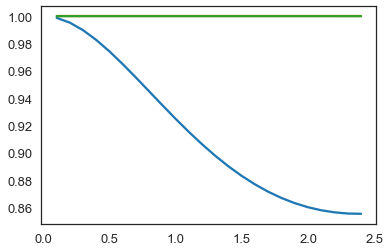

In [52]:
# effective range instead of overall range?
#plt.plot(d, test_vario)
#plt.plot(d, test_relation)
#plt.plot(d, test_cov)
plt.plot(d, test_matern1) # nugget effect and matern class wrong
plt.plot(d, test_matern2)
plt.plot(d, test_matern3)

In [53]:
'''Wackernagel (2003, pp. 57{58) noted that in contrast to the Linear and the Spherical
model, which reach the specied sill value b exactly at the nite range a, i.e. 
lin
a;b (a) =

sph
a;b (a) = b, the Exponential and the Gaussian model approach the sill asymptotically
for jhj ! 1, which has a non zero covariance as consequence. In this case, the practical
range equals approximately 3a for the Exponential and
p
3a for the Gaussian variogram
model, i.e. 
exp
a;b (3a)  0:95b and 
gau
a;b (
p
3a)  0:95b (cf. Webster and Oliver 2007, pp.
88{93; Pebesma 2001, p. 38).'''

'Wackernagel (2003, pp. 57{58) noted that in contrast to the Linear and the Spherical\nmodel, which reach the speci\x0ced sill value b exactly at the \x0cnite range a, i.e. \nlin\na;b (a) =\n\nsph\na;b (a) = b, the Exponential and the Gaussian model approach the sill asymptotically\nfor jhj ! 1, which has a non zero covariance as consequence. In this case, the practical\nrange equals approximately 3a for the Exponential and\np\n3a for the Gaussian variogram\nmodel, i.e. \nexp\na;b (3a) \x19 0:95b and \ngau\na;b (\np\n3a) \x19 0:95b (cf. Webster and Oliver 2007, pp.\n88{93; Pebesma 2001, p. 38).'